## Logistic Reg Bayes

In [1]:
# 설치 없이 상태경로로 모듈을 가져오는 부분입니다
import sys
import os
parent_dir = os.path.abspath("../")
sys.path.append(parent_dir)

import bok_da

In [1]:
import bok_da

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/generated_1000x4.csv")
df

,x1,x2,x3,x4,target
0,-0.785351,-0.882394,-0.591329,-2.455268,0
1,-0.753246,0.890832,0.934414,-0.674267,1
2,-0.802601,1.546045,-1.140014,0.741586,1
3,0.809788,1.692708,-0.038934,-0.516082,1
4,0.923345,-0.689635,-0.866196,1.828143,1
...,...,...,...,...,...
995,-0.789069,-0.041005,-0.730053,-0.349244,1
996,0.504786,-0.573993,0.826255,-0.293239,1
997,-1.357959,-0.921218,1.858536,0.485944,1
998,-0.513078,-0.967890,-0.342858,-0.341923,1


In [4]:
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
from bok_da.bayes.logistic_model import LogisticRegressionBayes

model = LogisticRegressionBayes(mcmcsize=5000, thinning = 1, method='adaptiveMCMC', verbose=True)
model.fit(X, y, add_const=True)

> Initializing Model...
  - Method: adaptiveMCMC
  - MCMC size: 5000
  - Number of chains: 1
  - Thinning: 1
  - Prior: weaklyinformative
  - Prior location: []
  - Prior scale: []
  - Prior alpha: 0.001
  - Prior beta: 0.001
  - Jumping rate: 0.1
  - Acceptance rate: 0.234
  - Seed: None
  - Verbose: True
> Start Fitting Model...
  - Input Data: 1000 samples, 5 features
  - Adding constant term to the model
  - Optimization Method: adaptiveMCMC


AdaptiveMCMC Weakly Informative Chain 1:   0%|          | 0/5000 [00:00<?, ?it/s]

AdaptiveMCMC Weakly Informative Chain 1: 100%|██████████| 5000/5000 [00:33<00:00, 149.54it/s]


> Model Fitted.


In [7]:
model.print_summary(digits=4)

---------------------------------------------------------------
Model Summary:

BIC: 610.5706

---------------------------------------------------------------
Variable      Mean      Var      2.5     97.5      ESS Acc Rate
---------------------------------------------------------------
const      -0.0672   0.0053  -0.1985   0.0812 680.9304   0.2438
x1          0.8174   0.0223   0.5123   1.0949 902.0388   0.2506
x2         -0.9793   0.0229  -1.2826  -0.6761 676.2725   0.2538
x3         -0.0737   0.0188  -0.3533   0.1972 767.9065   0.2478
x4          2.0578   0.0322   1.7135   2.4088 656.7995   0.2424
---------------------------------------------------------------


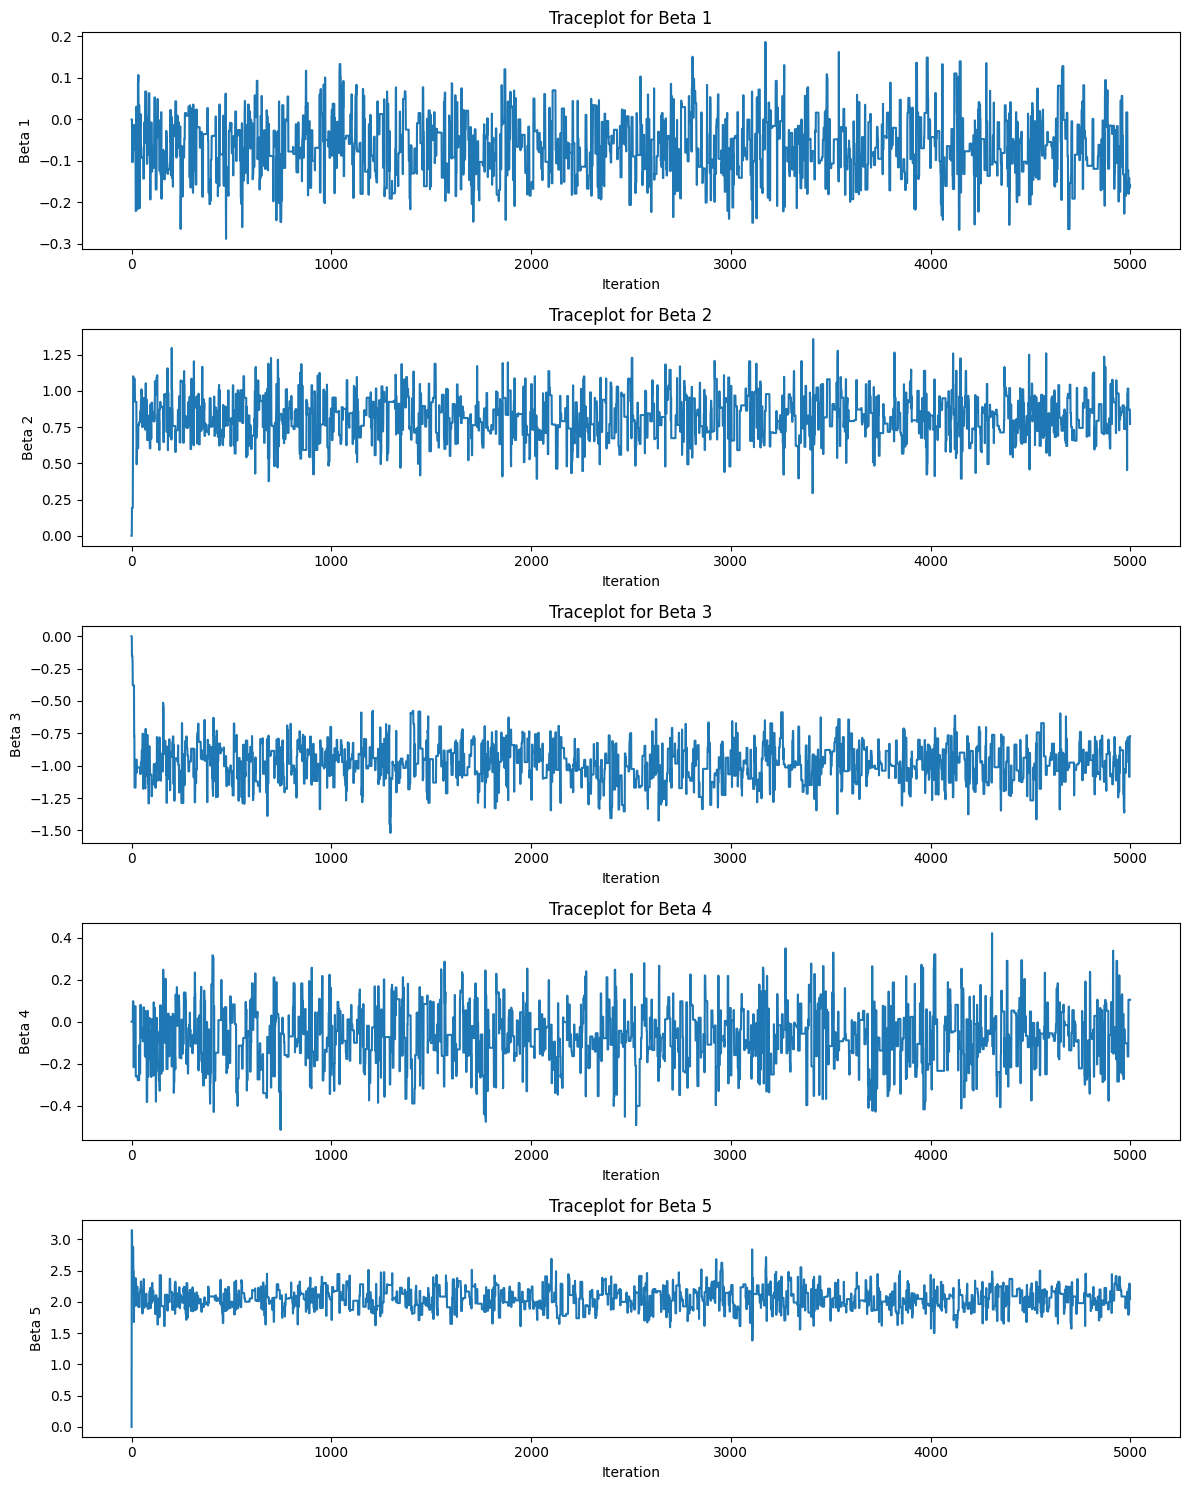

In [8]:
model.traceplot()

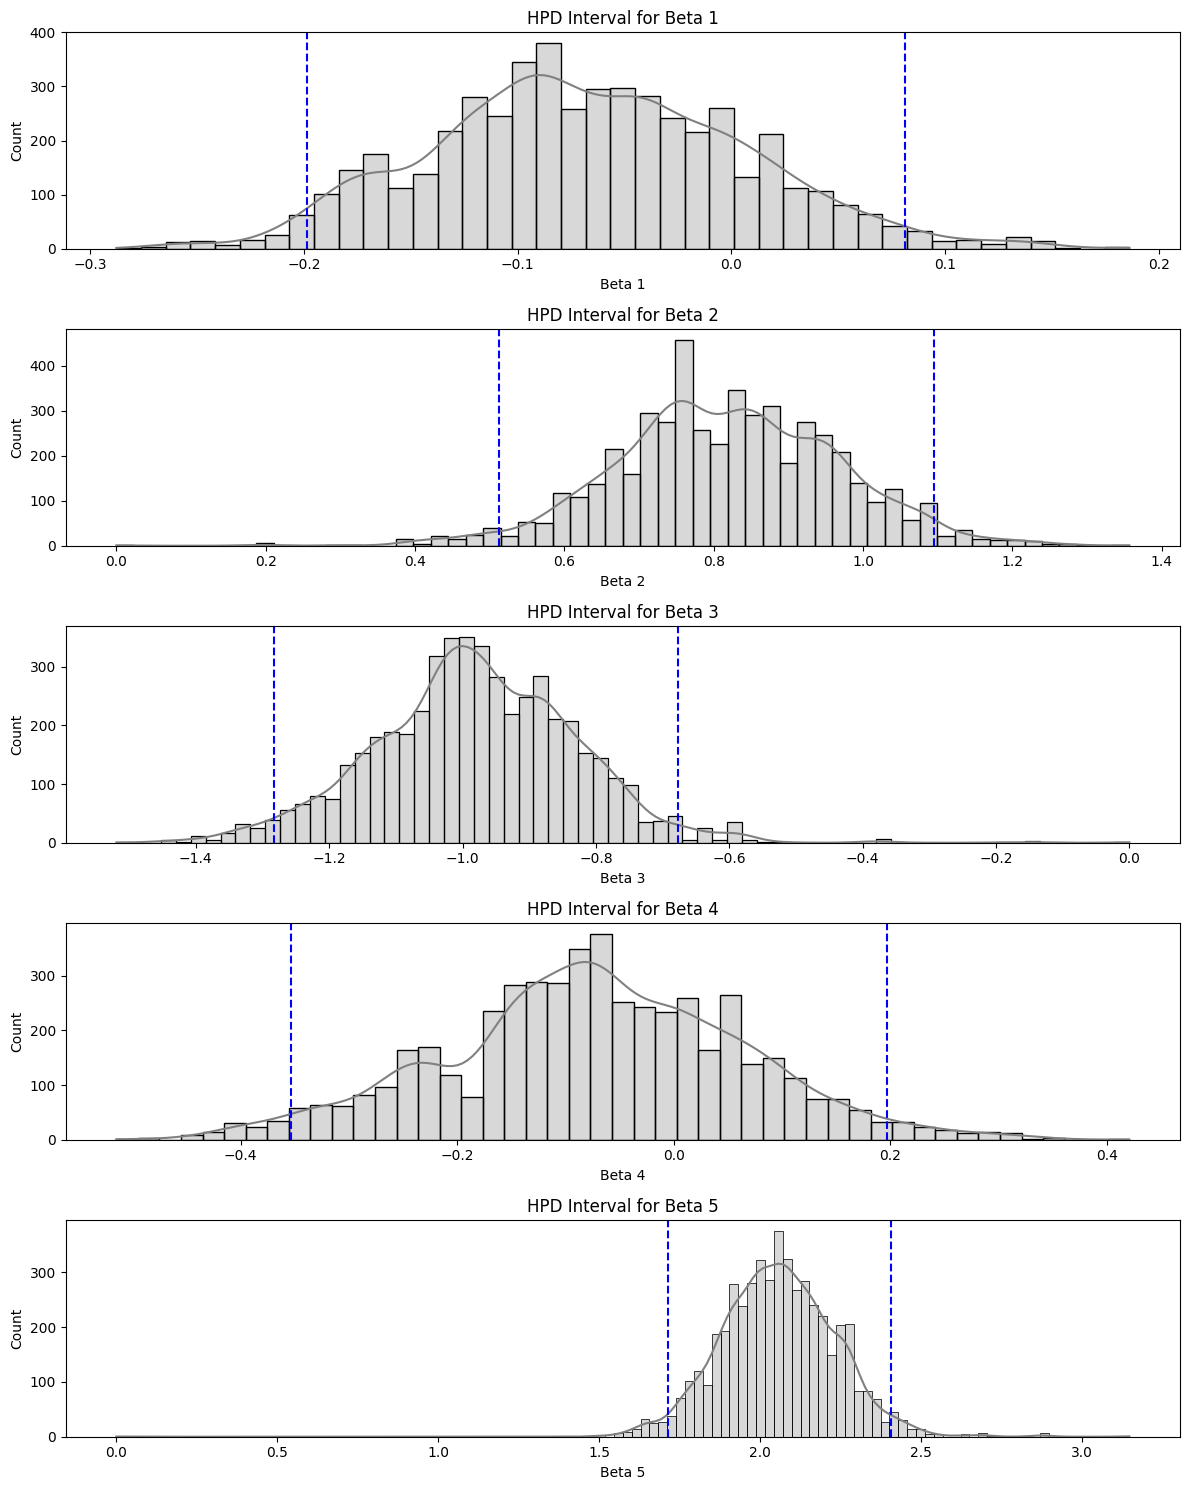

In [9]:
model.hpd_interval()

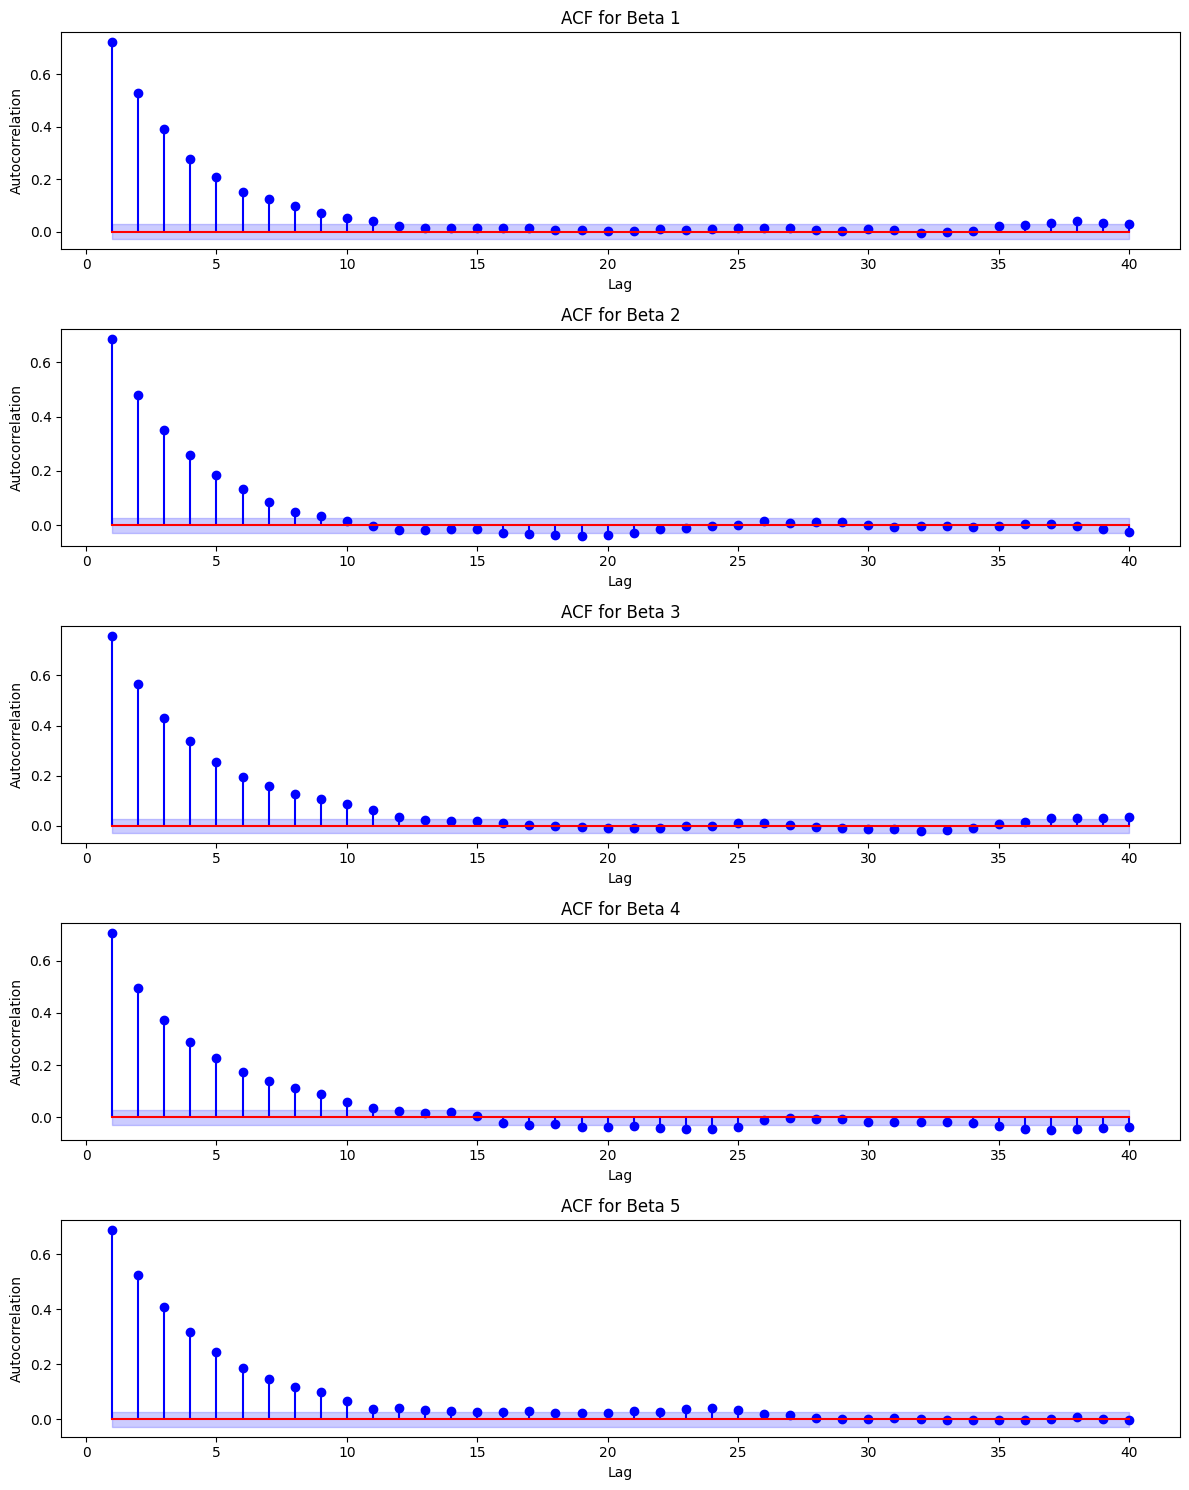

In [10]:
model.acf_plot()